In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os
import pathlib
import time
import copy
import re

In [2]:
def convertToYIQUpdate(rgbImage):
    rgbImage = rgbImage.astype(float)
    for i in range(len(rgbImage)):
        for j in range(len(rgbImage[0])):
            #print(rgbImage[i][j])
            Y = (0.299*rgbImage[i][j][0]) + (0.5876*rgbImage[i][j][1]) + (0.114*rgbImage[i][j][2])
            I = (0.596*rgbImage[i][j][0]) - (0.2746*rgbImage[i][j][1]) - (0.322*rgbImage[i][j][2])
            Q = (0.211*rgbImage[i][j][0]) - (0.5236*rgbImage[i][j][1]) + (0.312*rgbImage[i][j][2])
            rgbImage[i][j] = [Y, I, Q, 255]
            #print(rgbImage[i][j])
            #print("cut")
    return(rgbImage)

In [3]:
def convertToRGBUpdate(rgbImage):
    for i in range(len(rgbImage)):
        for j in range(len(rgbImage[0])):
            #print(rgbImage[i][j])
            R = min((rgbImage[i][j][0]) + (0.956*rgbImage[i][j][1]) + (0.619*rgbImage[i][j][2]), 255)
            G = min((rgbImage[i][j][0]) - (0.272*rgbImage[i][j][1]) - (0.647*rgbImage[i][j][2]), 255)
            B = min((rgbImage[i][j][0]) - (1.106*rgbImage[i][j][1]) + (1.703*rgbImage[i][j][2]), 255)
            rgbImage[i][j] = [(R), (G), (B), 255]
            #print(rgbImage[i][j])
            #print("cut")
    rgbImage = rgbImage.astype(int)
    return(rgbImage)

In [4]:
def correlationBkp(imageArg, mask, pivot):
    tempRes = np.empty([(len(imageArg)-2), (len(imageArg[0])-2), 4])
    for i in range(1, (len(imageArg)-1)):
        for j in range(1, (len(imageArg[0])-1)):
            # R
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i - 1)][(j - 1)][0]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][0]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][0]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i)][(j - 1)][0]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][0]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][0]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i + 1)][(j - 1)][0]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][0]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][0]) * float(mask[2][2])))
            
            # G
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i - 1)][(j - 1)][1]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][1]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][1]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i)][(j - 1)][1]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][1]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][1]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i + 1)][(j - 1)][1]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][1]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][1]) * float(mask[2][2])))
            
            # B
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i - 1)][(j - 1)][2]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][2]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][2]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i)][(j - 1)][2]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][2]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][2]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i + 1)][(j - 1)][2]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][2]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][2]) * float(mask[2][2])))
            
            tempRes[(i - 1)][(j - 1)][3] = 255
    return tempRes

In [5]:
def correlationBkp(imageArg, mask):
    tempRes = np.empty([(len(imageArg)-2), (len(imageArg[0])-2), 4])
    for i in range(1, (len(imageArg)-1)):
        for j in range(1, (len(imageArg[0])-1)):
            # R
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i - 1)][(j - 1)][0]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][0]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][0]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i)][(j - 1)][0]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][0]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][0]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][0] = round((float(imageArg[(i + 1)][(j - 1)][0]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][0]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][0]) * float(mask[2][2])))
            
            # G
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i - 1)][(j - 1)][1]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][1]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][1]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i)][(j - 1)][1]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][1]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][1]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][1] = round((float(imageArg[(i + 1)][(j - 1)][1]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][1]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][1]) * float(mask[2][2])))
            
            # B
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i - 1)][(j - 1)][2]) * float(mask[0][0])) + (float(imageArg[(i - 1)][(j)][2]) * float(mask[0][1])) + (float(imageArg[(i - 1)][(j+1)][2]) * float(mask[0][2])))
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i)][(j - 1)][2]) * float(mask[1][0])) + (float(imageArg[(i)][(j)][2]) * float(mask[1][1])) + (float(imageArg[(i)][(j+1)][2]) * float(mask[1][2])))
            tempRes[(i - 1)][(j - 1)][2] = round((float(imageArg[(i + 1)][(j - 1)][2]) * float(mask[2][0])) + (float(imageArg[(i + 1)][(j)][2]) * float(mask[2][1])) + (float(imageArg[(i + 1)][(j+1)][2]) * float(mask[2][2])))
            
            tempRes[(i - 1)][(j - 1)][3] = 255
    return tempRes

In [6]:
def negativeImg(imgBroad):
    return (-imgBroad + 255)

In [7]:
def correlation(imageArg, pivotArg, maskArg):
    # tempRes = np.copy(imageArg)
    tempRes = np.empty([(len(imageArg)), (len(imageArg[0])), 4])
    maxI = (len(imageArg))-1
    maxJ = (len(imageArg[0]))-1
    maxX = len(maskArg) - 1
    maxY = len(maskArg[0]) - 1

    # I = LINHA
    # J = COLUNA
    for i in range(0, (len(imageArg))):
        for j in range(0, (len(imageArg[0]))):
            currentPosMask = copy.deepcopy(pivotArg)
            innerI = i - currentPosMask[0]
            innerJ = j - currentPosMask[1]
            currentPosMask[0] = 0
            currentPosMask[1] = 0
            while not(currentPosMask[0] > maxX):
                # print(f'{mask[currentPosMask[0]][currentPosMask[1]]}')
                if (innerI >= 0 and innerI <= maxI) and (innerJ >= 0 and innerJ <= maxJ):
                    tempRes[i][j][0] = tempRes[i][j][0] + (imageArg[innerI][innerJ][0] * mask[currentPosMask[0]][currentPosMask[1]])
                    tempRes[i][j][1] = tempRes[i][j][1] + (imageArg[innerI][innerJ][1] * mask[currentPosMask[0]][currentPosMask[1]])
                    tempRes[i][j][2] = tempRes[i][j][2] + (imageArg[innerI][innerJ][2] * mask[currentPosMask[0]][currentPosMask[1]])
                    tempRes[i][j][3] = 255
                if (currentPosMask[1] >= maxY):
                    currentPosMask[0] = currentPosMask[0] + 1
                    currentPosMask[1] = 0
                    innerI = innerI + 1
                    innerJ = innerJ - maxY
                else:
                    currentPosMask[1] = currentPosMask[1] + 1
                    innerJ = innerJ + 1
    return(tempRes.astype('uint8'))

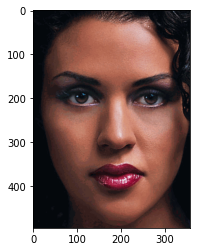

In [8]:
dirAtual = str(pathlib.Path().absolute())
image = io.imread(dirAtual + '/Imagens/Woman.png')
plt.imshow(image)

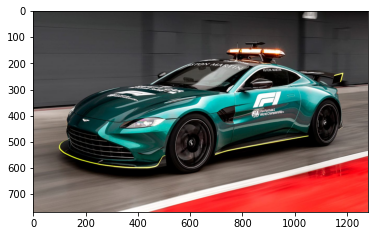

In [9]:
image2 = io.imread(dirAtual + '/Imagens/aston-vantage-safety-car.jpg')
plt.imshow(image2)

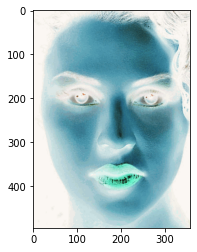

In [10]:
for i in range(len(image)):
        for j in range(len(image[0])):
            R = negativeImg(image[i][j][0])
            G = negativeImg(image[i][j][1])
            B = negativeImg(image[i][j][2])
            image[i][j] = [R, G, B, 255]
plt.imshow(image)

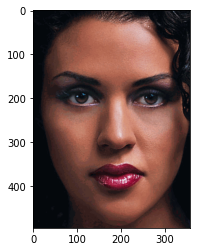

In [11]:
for i in range(len(image)):
        for j in range(len(image[0])):
            R = negativeImg(image[i][j][0])
            G = negativeImg(image[i][j][1])
            B = negativeImg(image[i][j][2])
            image[i][j] = [R, G, B, 255]
plt.imshow(image)

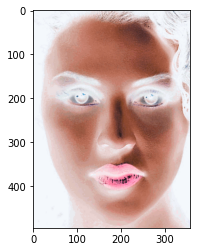

In [12]:
image = convertToYIQUpdate(image)
for i in range(len(image)):
        for j in range(len(image[0])):
            Y = negativeImg(image[i][j][0])
            I = image[i][j][1]
            Q = image[i][j][2]
            image[i][j] = [Y, I, Q, 255]
image = convertToRGBUpdate(image)
plt.imshow(image)
# plt.imshow(image.astype('uint8'))

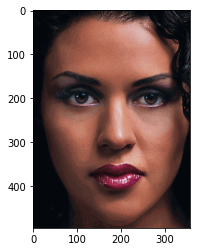

In [13]:
image = convertToYIQUpdate(image)
for i in range(len(image)):
        for j in range(len(image[0])):
            Y = negativeImg(image[i][j][0])
            I = image[i][j][1]
            Q = image[i][j][2]
            image[i][j] = [Y, I, Q, 255]
image = convertToRGBUpdate(image)
plt.imshow(image)

In [14]:
with open(dirAtual + '/filtroMedia.txt') as f:
    mask = f.readlines()
    originalPivot = [0, 0]
    for i in range(len(mask)):
        originalPivot = re.findall("(?<=\[).+?(?=\])", mask[i])
        mask[i] = re.findall("\d+\.\d+", mask[i])
    mask = list(filter(len, mask))
    for i in range(len(mask)):
        mask[i] = list(map(float, mask[i]))
    originalPivot = list(map(int, originalPivot))
    print(originalPivot)
    print(mask)

[1, 1]
[[0.11111111111, 0.11111111111, 0.11111111111], [0.11111111111, 0.11111111111, 0.11111111111], [0.11111111111, 0.11111111111, 0.11111111111]]


True

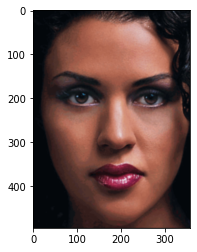

In [15]:
corrRes = correlation(image, originalPivot, mask)
plt.imshow(corrRes)
image_rgb = cv.cvtColor(corrRes, cv.COLOR_BGR2RGB)
cv.imwrite(dirAtual + '/ImagensOutput/womanmedia3x3.png', image_rgb) 

In [19]:
# 
f.close()
with open(dirAtual + '/sobelHorizontal.txt') as f:
    mask = f.readlines()
    originalPivot = [0, 0]
    for i in range(len(mask)):
        originalPivot = re.findall("(?<=\[).+?(?=\])", mask[i])
        mask[i] = re.findall("\d+\.\d+", mask[i])
    mask = list(filter(len, mask))
    for i in range(len(mask)):
        mask[i] = list(map(float, mask[i]))
    originalPivot = list(map(int, originalPivot))
    print(originalPivot)
    print(mask)

[1, 1]
[[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]]


True

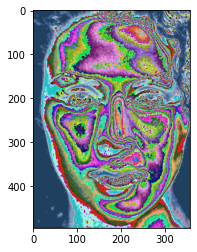

In [ ]:
corrRes = correlation(image, originalPivot, mask)
plt.imshow(corrRes)
image_rgb = cv.cvtColor(corrRes, cv.COLOR_BGR2RGB)
cv.imwrite(dirAtual + '/ImagensOutput/womanhorizontalsobel.png', image_rgb) 